In [23]:
import numpy as np
PI = np.pi
print("True value of pi:", PI)

True value of pi: 3.141592653589793


N:	Estimated Pi:	Absolute Error:
500	6.3333		3.1917
750	7.0		3.8584
1000	6.4		3.2584
2500	4.2083		1.0667
5000	3.48		0.33841
7500	3.1194		0.02219
10000	3.2614		0.11977
25000	2.9097		0.23185
50000	3.1316		0.010014
75000	3.1085		0.033109
100000	3.179		0.0374
250000	3.2001		0.05849
500000	3.0751		0.066447
750000	3.1524		0.010759
1000000	3.199		0.057415


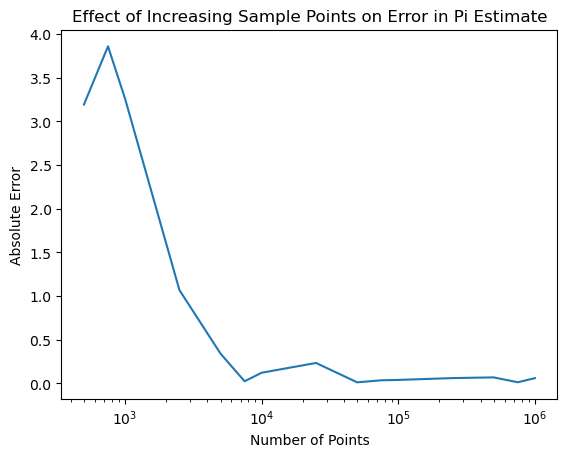

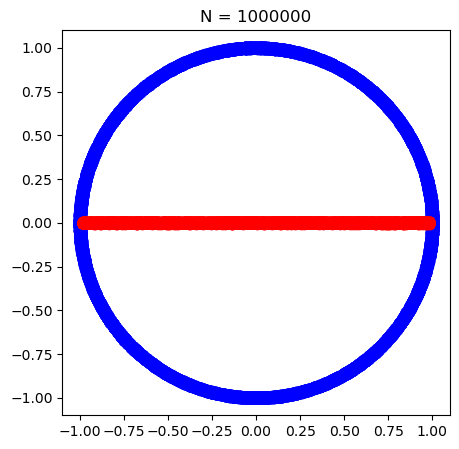

In [24]:
#MONTE CARLO

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

#function that gives pi estimate
def pi_montecarlo(n):
    
    x = np.random.uniform(-1.01, 1.01, n)
    y = np.random.uniform(-1.01, 1.01, n)

    perimeter = []
    diameter = []

    for i in range(n):
        if abs(((x[i])**2 + (y[i])**2)**.5 - 1) <= .01:
            perimeter.append(i)
        if abs(y[i]) <= .01 and abs(x[i]) <= 1:
            diameter.append(y[i])

    pi = (len(perimeter))/(len(diameter))
    abs_error = abs(pi-np.pi)
    
    return pi, abs_error

#number of random points we want to use
n_values = [500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000,250000,500000,750000,1000000]
    
x = []   #n values
y = []   #absolute errors
pis = [] #pi values from function estimate
for i in n_values:
    x.append(i)
    pi, err = pi_montecarlo(i)
    pis.append(pi)
    y.append(err)

#PRINTING Ns, ESTIMATES, AND ERRORS
print("N:\tEstimated Pi:\tAbsolute Error:")
for i in range(len(n_values)):
    print("{}\t{:.5}\t\t{:.5}".format(n_values[i],pis[i],y[i]))
    
#ABSOLUTE ERROR GRAPH
plt.figure()
plt.semilogx(x,y)
plt.xlabel("Number of Points")
plt.ylabel("Absolute Error")
plt.title("Effect of Increasing Sample Points on Error in Pi Estimate")
plt.show()

#CODE FOR ANIMATION
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
l1, = ax.plot([], [], 'o', color='blue')  # Circle points
l2, = ax.plot([], [], 'o', color='red')  # Strip points
def pi_montecarlo_graph(n):
    x = np.random.uniform(-1.01, 1.01, n)
    y = np.random.uniform(-1.01, 1.01, n)
    x1, y1 = [], []  # Circle points
    x2, y2 = [], []  # Strip points
    for i in range(n):
        if abs(((x[i])**2 + (y[i])**2)**.5 - 1) <= .01:
            x1.append(x[i])
            y1.append(y[i])
        else:
            if abs(y[i]) <= .01:
                x2.append(x[i])
                y2.append(y[i])
    l1.set_data(x1, y1)
    l2.set_data(x2, y2)
    ax.set_title("N = {}".format(n))
    return l1, l2,
ani = FuncAnimation(fig, pi_montecarlo_graph, frames=n_values, interval=600, blit=True)
HTML(ani.to_jshtml())

In [25]:
#in case we still want this basic graph-producing function

# def pi_montecarlo_graph(n):
#     x = np.random.uniform(-1.01, 1.01, n)
#     y = np.random.uniform(-1.01, 1.01, n)
#     x1 = []
#     y1 = []
#     for i in range(n):
#         if abs(((x[i])**2 + (y[i])**2)**.5 - 1) <= .01:
#             x1.append(x[i])
#             y1.append(y[i])
#     x2 = []
#     y2 = []
#     for i in range(n):
#         if abs(y[i]) <= .01:
#             y2.append(y[i])
#             x2.append(x[i])
#     plt.figure(figsize=(3,3))
#     plt.scatter(x1,y1, label="Circumference")
#     plt.scatter(x2,y2, label="Diameter")
#     plt.legend(fontsize=8, loc='upper right')
#     plt.title("N = {}".format(n))
#     plt.show()
    

Approximation of pi using polygon perimeter method with n=1,000,000 sides: 3.1415926535846257


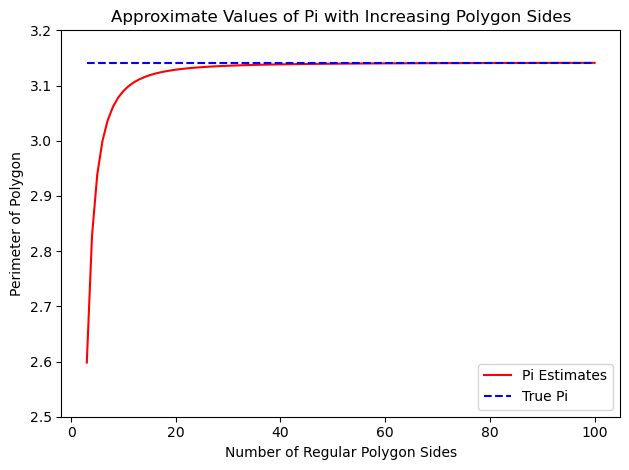

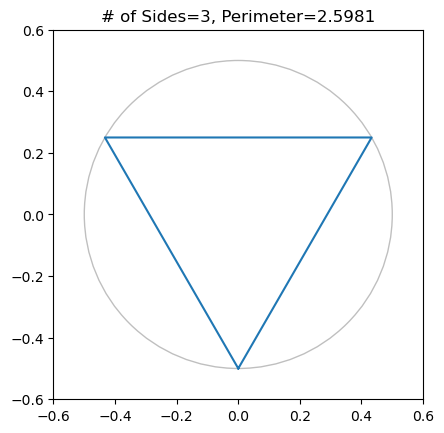

In [4]:
#POLYGON PERIMETER

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
%matplotlib inline

def perimeter(r,n):
    p = 2*n*r*np.sin(np.deg2rad(180)/n)
    return p

our_pi = perimeter(.5, 1000000)
print("Approximation of pi using polygon perimeter method with n=1,000,000 sides:", our_pi)

#GRAPH - APPROACHING PI
n_max = 100
n_values = []
for i in range(3, n_max+1):
    n_values.append(i)
perimeter_est = []
for i in range(len(n_values)):
    perimeter_est.append(perimeter(.5, n_values[i]))
pis = [np.pi]*len(n_values)

plt.figure()
plt.plot(n_values,perimeter_est, label="Pi Estimates", color="red")
plt.ylim(2.5,3.2)
plt.plot(n_values,pis, "--", color="blue", label="True Pi")
plt.title("Approximate Values of Pi with Increasing Polygon Sides")
plt.xlabel("Number of Regular Polygon Sides")
plt.ylabel("Perimeter of Polygon")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


#ANIMATION
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-.6, .6)
ax.set_ylim(-.6, .6)
# Create a circle with diameter 1
circle = plt.Circle((0, 0), 0.5, fill=False, alpha=.25)
ax.add_artist(circle)
# Initialize the polygon with 3 sides (triangle)
n_sides = 3
r = 0.5
perim = perimeter(r, n_sides)
x = np.zeros(n_sides)
y = np.zeros(n_sides)
for i in range(n_sides):               #determines x and y coordinates of each vertex by angles and trig
    angle_deg = i * 360 / n_sides
    angle_rad = np.deg2rad(angle_deg)
    x[i] = r * np.cos(angle_rad)
    y[i] = r * np.sin(angle_rad)
polygon, = ax.plot(x, y)        #the comma is necessary to make it a tuple rather than a list
# Function to update the polygon with more sides
def update_polygon(i):
    global n_sides, r, polygon, perim   #changes made to these variables within the function are reflected outside of the function as well
    n_sides = 3 + i
    perim = perimeter(r, n_sides)
    x = np.zeros(n_sides)
    y = np.zeros(n_sides)
    start_angle_deg = -90
    for j in range(n_sides):
        angle_deg = start_angle_deg + j * 360 / n_sides
        angle_rad = np.deg2rad(angle_deg)
        x[j] = r * np.cos(angle_rad)
        y[j] = r * np.sin(angle_rad)
    x = np.append(x, x[0])  # Add the first vertex to the end to close the polygon
    y = np.append(y, y[0])
    polygon.set_data(x, y)     #updates the data of the polygon object to the new x and y coordinates
    ax.set_title(f"# of Sides={n_sides}, Perimeter={perim:.4f}")
    return polygon,
ani = animation.FuncAnimation(fig, update_polygon, frames=37, interval=400)
HTML(ani.to_jshtml()) 

Leibniz Formula:


<IPython.core.display.Latex object>

Approximation of pi using Leibniz method with n=1,000,000 terms: 3.1415916535897743


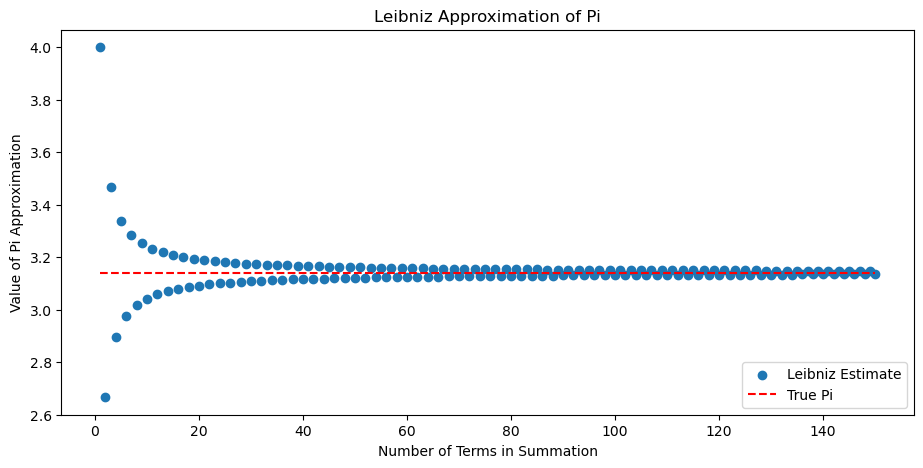

In [27]:
#LEIBNIZ

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

n_terms = 150

print("Leibniz Formula:")
latex_str = r"$\Large\frac{\pi}{4} \approx \sum_{i=0}^{\infty}\frac{(-1)^i}{2i+1}$"    #Latex formatting
display(Latex(latex_str))

def pi_leibniz(n):
    sum = 0
    sign = 1
    for i in range(n):
        term = sign / (2*i + 1)
        sum += term
        sign *= -1
    pi = 4 * sum
    return pi

ns = [i for i in range(1, n_terms+1)]
pis = []
true_pi = [np.pi]*len(ns)
for i in range(len(ns)):
    pis.append(pi_leibniz(ns[i]))

print("Approximation of pi using Leibniz method with n=1,000,000 terms:", pi_leibniz(1000000))
    
plt.figure(figsize=(11,5))
plt.scatter(ns,pis, label="Leibniz Estimate")
plt.plot(ns, true_pi, '--', color='red', label="True Pi")
plt.title("Leibniz Approximation of Pi")
plt.xlabel("Number of Terms in Summation")
plt.ylabel("Value of Pi Approximation")
plt.legend(loc='lower right')
plt.show()


<IPython.core.display.Latex object>

Approximation of pi using Wallace Product method with n=1,000,000 terms: 3.141591868192149


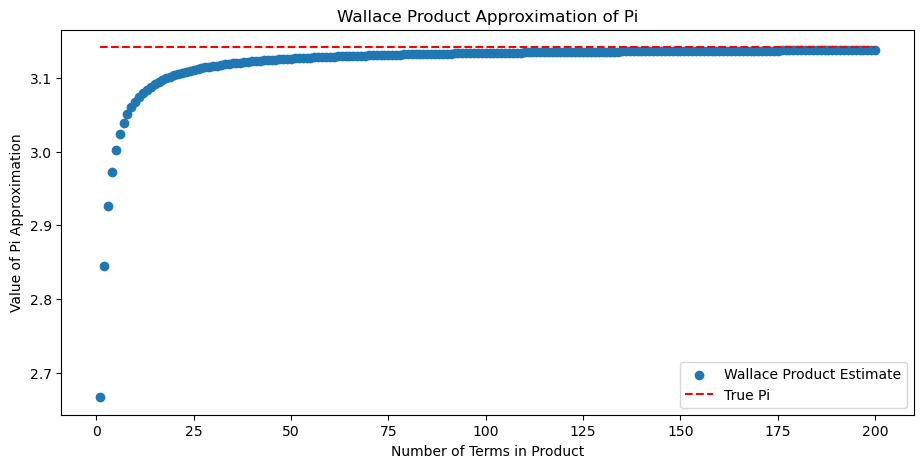

In [17]:
#WALLACE PRODUCT

from IPython.display import display, Latex

latex_str = r"$\Large\pi \approx 2 \prod_{i=1}^{\infty} \frac{(2i)^2}{(2i-1)(2i+1)}$"    # Latex formatting
display(Latex(latex_str))

def pi_wallace(n):
    s = 1
    for i in range(1, n+1):
        s *= (2 * i) ** 2 / ((2 * i - 1) * (2 * i + 1))
    return 2*s

print("Approximation of pi using Wallace Product method with n=1,000,000 terms:", pi_wallace(1000000))

n_terms = 200

ns = [i for i in range(1, n_terms+1)]
pis = []
true_pi = [np.pi]*len(ns)
for i in range(len(ns)):
    pis.append(pi_wallace(ns[i]))
    
plt.figure(figsize=(11,5))
plt.scatter(ns,pis, label="Wallace Product Estimate")
plt.plot(ns, true_pi, '--', color='red', label="True Pi")
plt.title("Wallace Product Approximation of Pi")
plt.xlabel("Number of Terms in Product")
plt.ylabel("Value of Pi Approximation")
plt.legend(loc='lower right')

plt.show()

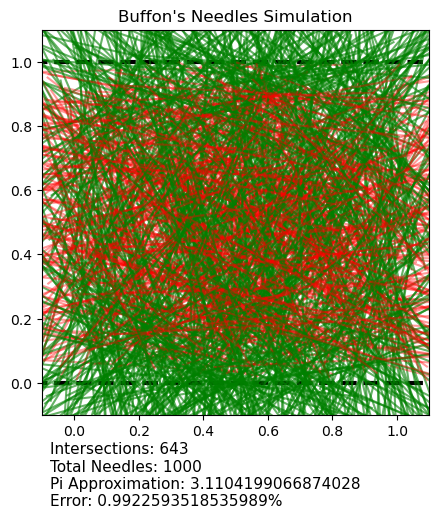

In [21]:
#BUFFON NEEDLE

import matplotlib.pyplot as plt
import random
import math
import numpy as np




#FUNCTIONS NEEDED FOR 'SIMULATION'

#create needles (line connecting two endpoints, length 1)
def needle():
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    theta = random.uniform(0, np.pi)
    needle_coords = np.array([x, y])
    components = np.array([np.cos(theta), np.sin(theta)])
    end_pts = np.array([needle_coords - components/2, needle_coords + components/2])
    return needle_coords, components, end_pts



def needle_toss(fl, boards, needles_list, intersections, buffon):
    needle_coords, components, end_pts = needle()

    needles_list.append((end_pts, components))

    x_coords = [end_pts[0][0], end_pts[1][0]]
    y_coords = [end_pts[0][1], end_pts[1][1]]

    for board in range(boards):
        if end_pts[0][1] < fl[board] < end_pts[1][1]:
            intersections += 1
            buffon.plot(x_coords, y_coords, color='green', alpha=.6)
            return intersections

    buffon.plot(x_coords, y_coords, color='red', alpha=.4)
    return intersections


def estimate_pi(intersections, needles_tossed):
    if intersections == 0:
        estimated_pi = 0
    else:
        estimated_pi = 2*(needles_tossed) / (1 * intersections)
    error = abs(((np.pi - estimated_pi)/np.pi)*100)
    return ("Intersections: " +str(intersections)+ "\nTotal Needles: " +str(needles_tossed)+ "\nPi Approximation: " +str(estimated_pi)+ "\nError: " +str(error)+ "%")


def plot_needles(fl, boards, buffon):
    needles_list = []
    intersections = 0

    for needle in range(n):
        intersections = needle_toss(fl, boards, needles_list, intersections, buffon)
        results_text.set_text(estimate_pi(intersections, needle+1))
        if (needle+1) % (n) == 0:
            plt.pause(1/111)


fl = []
intersections = 0
boards = 2
needles_list = []

fig = plt.figure(figsize=(5, 5))
buffon = plt.subplot()
results_text = buffon.text(0.02, -0.07, estimate_pi(intersections, 0), transform=buffon.transAxes, size=11, verticalalignment='top')
buffon.set_xlim(-0.1, 1.1)
buffon.set_ylim(-0.1, 1.1)
plt.title("Buffon's Needles Simulation")

for j in range(boards):
    fl.append(0+j)
    buffon.hlines(y=fl[j], xmin=-.2, xmax=1.2, color='black', linestyle='--', linewidth=3.0)

plot_needles(fl, boards, buffon)

plt.show()
n = 1000   #number of needles



N:	Estimated Pi:		Absolute Error:
1	3.00000000000000	0.14159265358979
2	3.16666666666667	0.02507401307687
3	3.13333333333333	0.00825932025646
4	3.14523809523810	0.00364544164830
6	3.14271284271284	0.00112018912305
8	3.14207181707182	0.00047916348202
10	3.14183961892940	0.00024696533961
25	3.14157668543503	0.00001596815476
50	3.14159465259101	0.00000199900122
100	3.14159290355855	0.00000024996876
500	3.14159265558978	0.00000000199999
1000	3.14159265383979	0.00000000025000
5000	3.14159265359180	0.00000000000201
10000	3.14159265359004	0.00000000000025
50000	3.14159265358979	0.00000000000000
100000	3.14159265358979	0.00000000000001
1000000	3.14159265358979	0.00000000000001


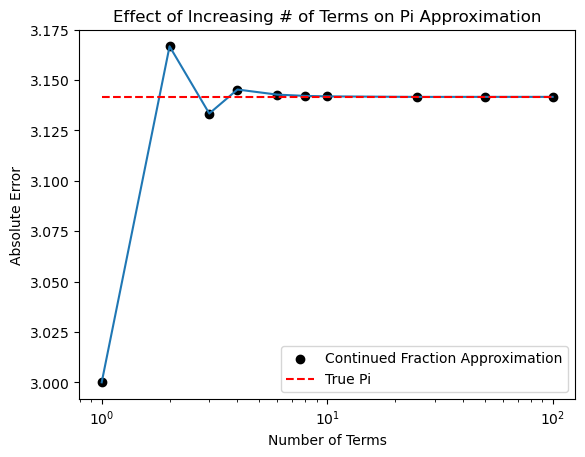

In [30]:
#CONTINUED FRACTION

import numpy as np
import matplotlib.pyplot as plt

def pi_cont_frac(num_terms):
    result = 0
    for i in range(num_terms):
        if i == 0:
            result = 3
        else:
            if i % 2 == 1:
                result += 4 / (i * 2 * (i * 2 + 1) * (i * 2 + 2))
            else:
                result -= 4 / (i * 2 * (i * 2 + 1) * (i * 2 + 2))
    return result

n_values = [1,2,3,4,6,8,10,25,50,100,500,1000,5000,10000,50000,100000,1000000]
    
x = []   #n values
y = []   #absolute errors
pis = [] #pi values from function estimate
true_pis=[np.pi]*11
for i in n_values:
    x.append(i)
    pi = pi_cont_frac(i)
    pis.append(pi)
    y.append(abs(np.pi-(pi)))

#print N value, estimated pi from function, and absolute error
print("N:\tEstimated Pi:\t\tAbsolute Error:")
for i in range(len(n_values)):
    print("{}\t{:.14f}\t{:.14f}".format(n_values[i],pis[i],y[i]))
    
#plot N values on x, and absolute errors on y
plt.figure()
plt.semilogx(x[:10],pis[:10])
plt.scatter(x[:10],pis[:10], color='black', label='Continued Fraction Approximation')
plt.plot(x[:10],true_pis[:10], "--", color='red', label='True Pi')
plt.xlabel("Number of Terms")
plt.ylabel("Absolute Error")
plt.title("Effect of Increasing # of Terms on Pi Approximation")
plt.legend(loc='lower right')
plt.show()

In [54]:
#is this the continued fraction we should use instead? it doesnt look like this is what we have

from IPython.display import Latex

latex_str = r"$\large\pi = 3 + \cfrac{4}{2\cdot3\cdot4 - \cfrac{4}{4\cdot5\cdot6 - \cfrac{4}{6\cdot7\cdot8 - \cfrac{4}{8\cdot9\cdot10 - \cdots}}}}$"

display(Latex(latex_str))


<IPython.core.display.Latex object>

Real value of e: 2.7182818285

Left-hand integration approximations of e within 0.0001% error:
2.7182777182777182

Right-hand integration approximations of e within 0.0001% error:
2.7182817182817183

Trapezoid integration approximations of e within 0.0001% error:
2.718279718279718

Comparing the integration results from these three methods, the right hand approximation is the closest to the true value of e.


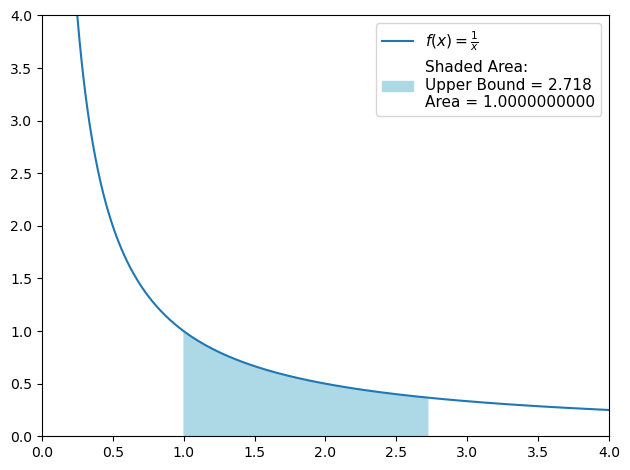

interactive(children=(FloatSlider(value=2.8, description='upper_bound', max=4.0, min=1.0, step=0.01), Output()…

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


print("Real value of e: {:.10f}".format(math.e))

x = np.linspace(1,3,1000000)
y = 1/x

#LEFT RIEMANN SUMS
areasLH = []
for i in range(len(x)-1):
    areasLH.append((x[i+1]-x[i])*y[i])
total_areasLH = []
sumsLH = 0
for i in areasLH:
    sumsLH += i
    total_areasLH.append(sumsLH)
print("\nLeft-hand integration approximations of e within 0.0001% error:")
eL = []
for i in total_areasLH:
    if abs(1-i) <= 0.000001:
        eL.append(x[total_areasLH.index(i)])
eLH = np.mean(eL)
print(eLH)

        
#RIGHT RIEMANN SUMS
areasRH = []
for i in range(len(x)-1):
    areasRH.append((x[i+1]-x[i])*y[i+1])
total_areasRH = []
sumsRH = 0
for i in areasRH:
    sumsRH += i
    total_areasRH.append(sumsRH)
print("\nRight-hand integration approximations of e within 0.0001% error:")
eR = []
for i in total_areasRH:
    if abs(1-i) <= 0.000001:
        eR.append(x[total_areasRH.index(i)])
eRH = np.mean(eR)
print(eRH)

        
#TRAPEZOIDAL SUMS
areasTZ = []  
for i in range(len(x)-1):
    areasTZ.append((1/2)*(x[i+1]-x[i])*((y[i+1]+y[i])))
total_areasTZ = []
sumsTZ = 0
for i in areasTZ:
    sumsTZ += i
    total_areasTZ.append(sumsTZ)
print("\nTrapezoid integration approximations of e within 0.0001% error:") 
eTZ = []
for i in total_areasTZ:
    if abs(1-i) <= 0.000001:
        eTZ.append(x[total_areasTZ.index(i)])
eTPZ = np.mean(eTZ)
print(eTPZ)

print("\nComparing the integration results from these three methods, the right hand approximation is the closest to the true value of e.")

        
def f(x):
    return 1/x

x1 = np.linspace(.25, 4, 1000)
plt.plot(x1, f(x1), label="$f(x)=\\frac{1}{x}$")
plt.xlim(0,4)
plt.ylim(0,4)
plt.tight_layout()

x_upper = math.e
x3 = np.linspace(1,x_upper,1000000)

areasTZ = []  
for i in range(len(x3)-1):
    areasTZ.append((1/2)*(x3[i+1]-x3[i])*((f(x3[i])+f(x3[i+1]))))
total_areasTZ = []
sumsTZ = 0
for i in areasTZ:
    sumsTZ += i
    total_areasTZ.append(sumsTZ)

x2 = np.linspace(1, x_upper, 1000)
y2 = f(x2)
plt.fill_between(x2, y2, color="lightblue", label="Shaded Area:\nUpper Bound = {:.3f}\nArea = {:.10f}".format(x_upper,total_areasTZ[-1]))

plt.legend(fontsize=11)


x1 = np.linspace(.25, 4, 1000)
y1 = f(x1)

def plot_integral(upper_bound):
    x_upper = upper_bound
    x3 = np.linspace(1,x_upper,1000000)

    areasTZ = []  
    for i in range(len(x3)-1):
        areasTZ.append((1/2)*(x3[i+1]-x3[i])*((f(x3[i])+f(x3[i+1]))))
    total_areasTZ = []
    sumsTZ = 0
    for i in areasTZ:
        sumsTZ += i
        total_areasTZ.append(sumsTZ)

    x2 = np.linspace(1, x_upper, 1000)
    y2 = f(x2)
    plt.fill_between(x2, y2, color="lightblue", label="Shaded Area:\nUpper Bound = {:.3f}\nArea = {:.10f}".format(x_upper,total_areasTZ[-1]))
    plt.plot(x1, y1, label="$f(x)=\\frac{1}{x}$")
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.legend(fontsize=11)
    plt.show()

interact(plot_integral, upper_bound=FloatSlider(min=1, max=4, step=0.01, value=2.8));

In [ ]:
#NOT PLANNING TO USE THE BELOW



#ramanujan’s formula

import math

def pi_raman():
    total = 0
    k = 0
    while True:
        numerator = math.factorial(4*k) * (1103 + 26390*k)
        denominator = (math.factorial(k)**4) * 396**(4*k)
        term = numerator / denominator
        total += term
        if abs(term) < 1e-15:
            break
        k += 1
    return 1 / ((2*math.sqrt(2)/9801) * total)

print(pi_raman())


#Bailey-Borwein-Plouffe

def pi_bbp(digits):
    pi = 0
    k = 0
    while True:
        term = (1/16**k)*((4/(8*k+1))-(2/(8*k+4))-(1/(8*k+5))-(1/(8*k+6)))
        pi += term
        k += 1
        if k > digits:
            break
    return pi

pi = pi_bbp(2)

print(pi)


#gauss-legendre

import math

def pi(precision):
    a = 1
    b = 1/math.sqrt(2)
    t = 1/4
    p = 1
    last_pi = 0
    for i in range(precision):
        a_next = (a + b)/2
        b_next = math.sqrt(a * b)
        t_next = t - p * (a - a_next)**2
        p_next = 2 * p
        pi_estimate = (a + b)**2 / (4 * t_next)
        if abs(pi_estimate - last_pi) < 1e-15:
            break
        last_pi = pi_estimate
        a, b, t, p = a_next, b_next, t_next, p_next
    return pi_estimate

print(pi(100000))